In [5]:
from iqtools import *

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [8]:
filename='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.18.07.820.tiq'
filename2='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.06.55.25.448.tiq'
filename_min='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.04.38.59.889.tiq'
filename_max='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.23.54.31.735.tiq'

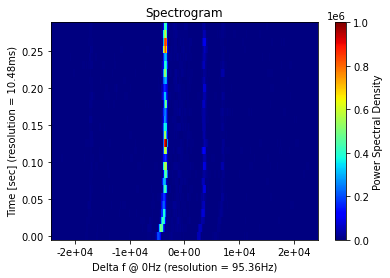

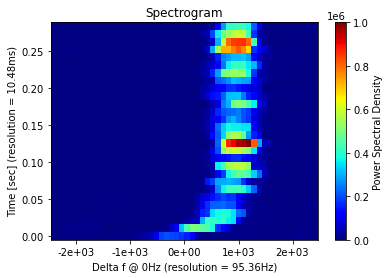

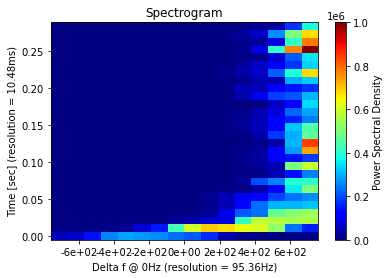

In [839]:
iq = get_iq_object(filename)
iq.read_samples(1)
lframes=512

time=0.3 #tdeath seconds of data                                                             
skip_time=5.025 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                         \                                                                                                      \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f]       
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-4.5e3,xspan=5000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
nnxx,nnyy,nnzz=get_cut_spectrogram(xx,yy,zz, xcen=-4.5e3,xspan=1500)
plot_spectrogram(nnxx,nnyy,nnzz)
plt.show()

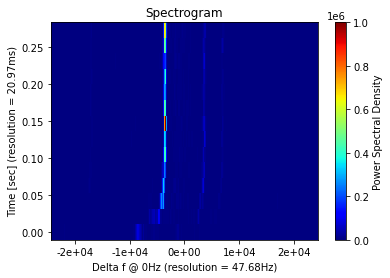

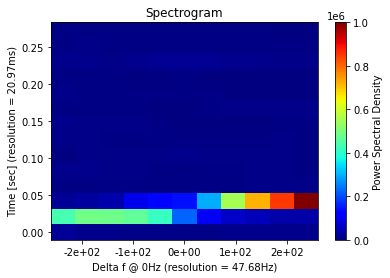

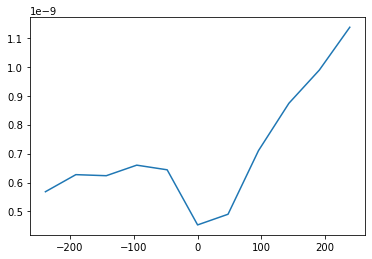

7.069082339322039e-10

In [294]:
iq = get_iq_object(filename)
iq.read_samples(1)
lframes=1024

time=0.3 #tdeath seconds of data                                                             
skip_time=5 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-4.5e3,xspan=500)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plt.plot(axx[0,:], azz[0,:])
plt.show()
np.average(azz[0,:])

In [26]:
def do_it(filename, lframes, time, skip,xcen,xspan):
    iq = get_iq_object(filename)
    iq.read_samples(1)                                                          
    nframes=int(time*iq.fs/lframes)
    sframes=int(skip*iq.fs/lframes)
    iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
    iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
    xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
    nxx,nyy,nzz=get_cut_spectrogram2(xx,yy,zz, xcen=xcen, xspan=xspan)
    return nxx,nyy,nzz
    #plot_spectrum(axx[0,:], azz[0,:], dbm=True)
    #np.average(azz[0,:])

In [935]:
def isomer_substract(f,l,t,s,s2,fs):
    xx,yy,zz=do_it(f,l,t,s,s2,fs)
    xx2,yy2,zz2=do_it(f,l,t,s,s2,fs)
    #plot_spectrogram(xx,yy,zz)
    #plt.show()
    #plot_spectrogram(xx2,yy2,zz2)
    #plt.show()
    #nzz=zz-zz2
    #plot_spectrogram(xx,yy,nzz)
    #plt.show()
    #axxn,ayyn,azzn=get_averaged_spectrogram(xx,yy,nzz, len(xx[:,0]))
    axx,ayy,azz=get_averaged_spectrogram(xx,yy,zz, len(xx[:,0]))
    axxp,ayyp,azzp=get_averaged_spectrogram(xx2,yy2,zz2, len(xx2[:,0]))
    #plt.plot(axx[0,:], azz[0,:])#, #axxp[0,:], azzp[0,:])#, #axxn[0,:], azzn[0,:])
    plot_spectrum(axx[0,:], azz[0,:],dbm=True)
    plt.show()

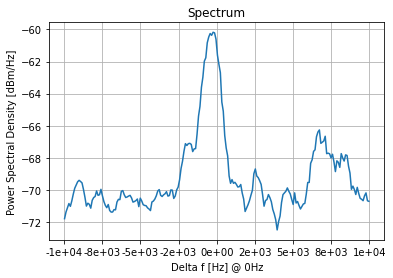

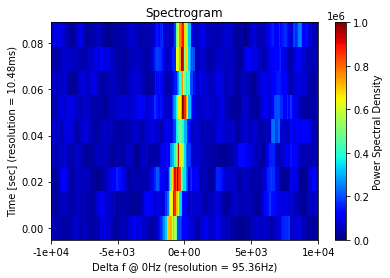

In [62]:
xx,yy,zz=do_it(filename2,512,0.1,5.025,0,20e3)
axx,ayy,azz=get_averaged_spectrogram(xx,yy,zz, len(xx[:,0]))
plot_spectrum(axx[0,:], azz[0,:],dbm=True)
plt.show()
plot_spectrogram(xx,yy,zz)
plt.show()

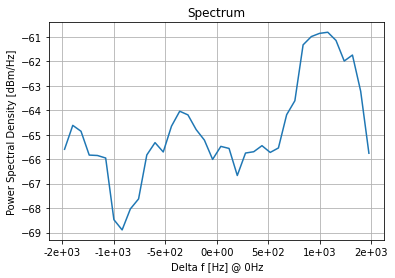

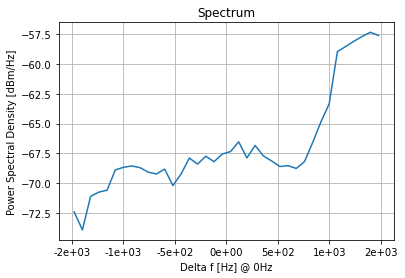

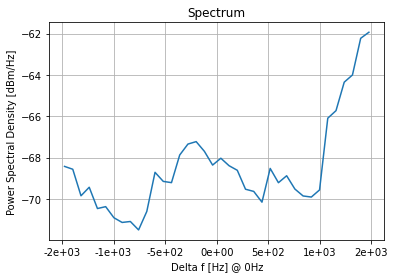

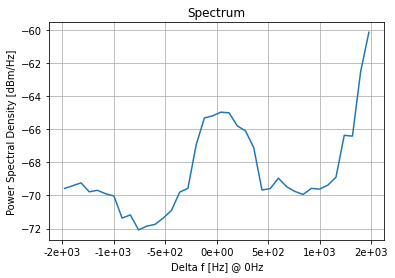

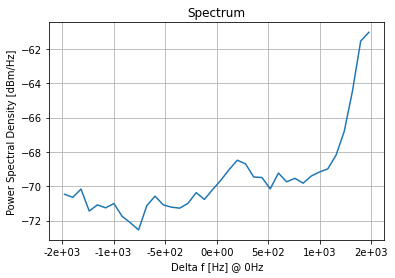

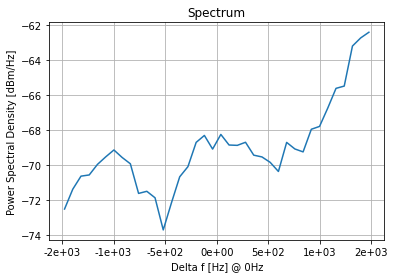

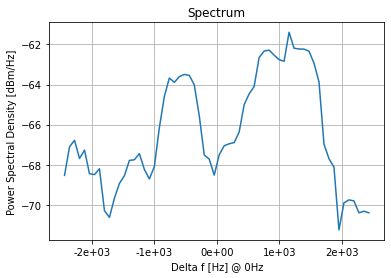

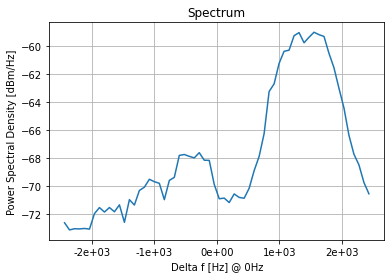

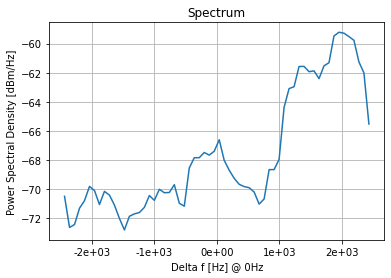

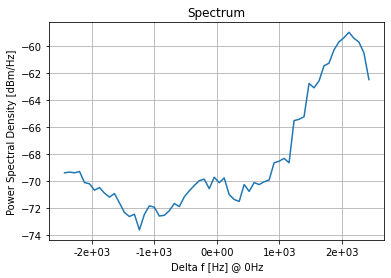

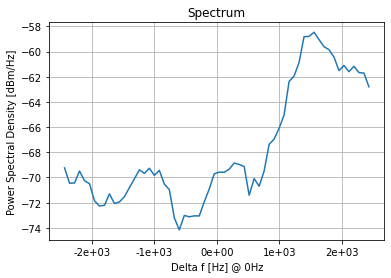

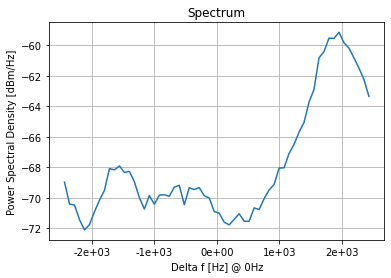

In [78]:
isomer_substract(filename2,612,0.03,5.025,-2e3,3e3)
isomer_substract(filename2,612,0.03,5.05,-2e3,3e3)
isomer_substract(filename2,612,0.03,5.075,-2e3,3e3)
isomer_substract(filename2,612,0.03,5.1,-2e3,3e3)
isomer_substract(filename2,612,0.03,5.4,-2e3,3e3)
isomer_substract(filename2,612,0.03,6.8,-2e3,3e3)
f='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.06.55.37.478.tiq'
isomer_substract(f,612,0.03,5.025,-2e3,5e3)
isomer_substract(f,612,0.03,5.05,-2e3,5e3)
isomer_substract(f,612,0.03,5.075,-2e3,5e3)
isomer_substract(f,612,0.03,5.1,-2e3,5e3)
isomer_substract(f,612,0.03,5.4,-2e3,5e3)
isomer_substract(f,612,0.03,6.8,-2e3,5filename2
filename2
filename2
filename2
filename2
filename2e3)

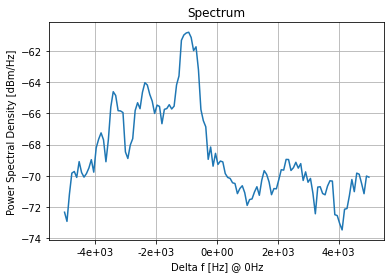

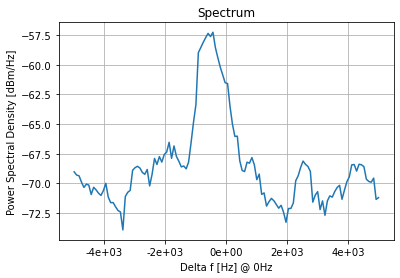

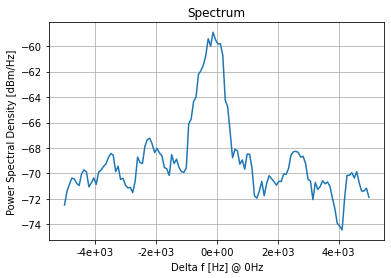

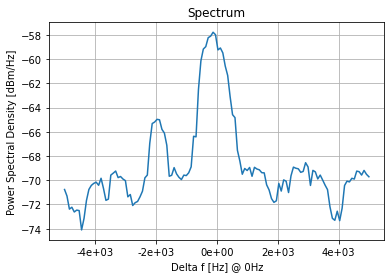

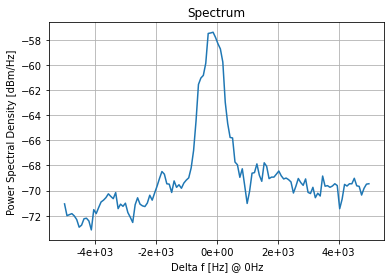

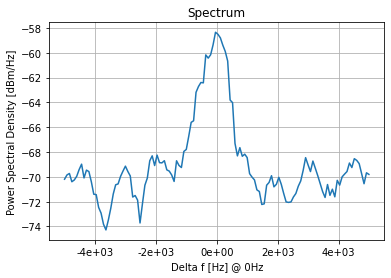

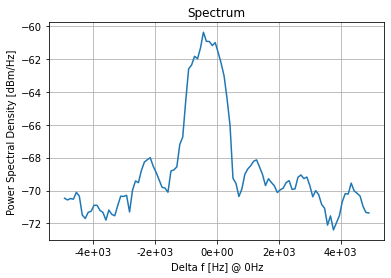

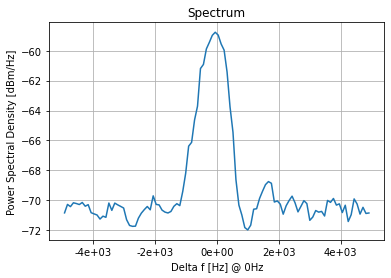

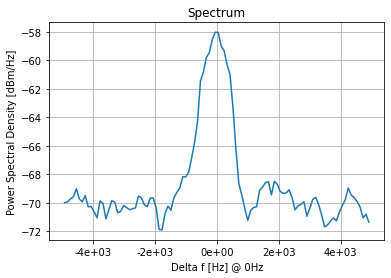

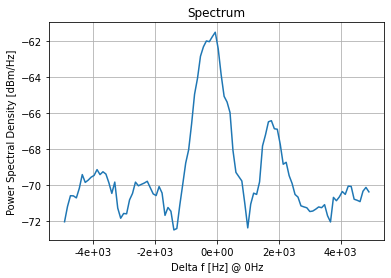

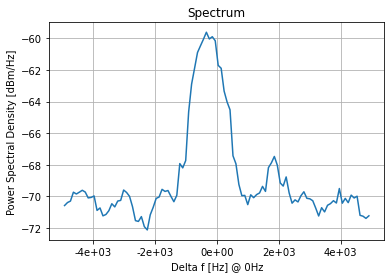

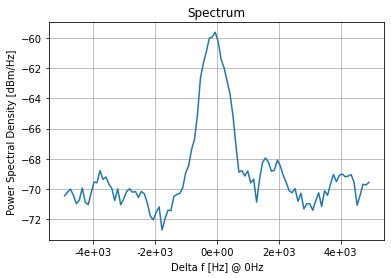

In [73]:
isomer_substract(filename2,612,0.03,5.025,0,1e4)
isomer_substract(filename2,612,0.03,5.05,0,1e4)
isomer_substract(filename2,612,0.03,5.075,0,1e4)
isomer_substract(filename2,612,0.03,5.1,0,1e4)
isomer_substract(filename2,612,0.03,5.4,0,1e4)
isomer_substract(filename2,612,0.03,6.8,0,1e4)
f='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.06.55.37.478.tiq'
isomer_substract(f,512,0.05,5.05,0,1e4)
isomer_substract(f,512,0.05,5.1,0,1e4)
isomer_substract(f,512,0.05,5.2,0,1e4)
isomer_substract(f,512,0.05,5.3,0,1e4)
isomer_substract(f,512,0.05,5.4,0,1e4)
isomer_substract(f,512,0.05,6.8,0,1e4)

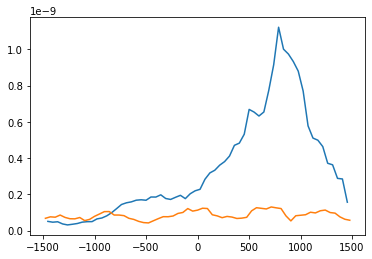

(True,
 array([[-1454.35333252, -1406.6696167 , -1358.98590088, -1311.30218506,
         -1263.61846924, -1215.93475342, -1168.2510376 , -1120.56732178,
         -1072.88360596, -1025.19989014,  -977.51617432,  -929.8324585 ,
          -882.14874268,  -834.46502686,  -786.78131104,  -739.09759521,
          -691.41387939,  -643.73016357,  -596.04644775,  -548.36273193,
          -500.67901611,  -452.99530029,  -405.31158447,  -357.62786865,
          -309.94415283,  -262.26043701,  -214.57672119,  -166.89300537,
          -119.20928955,   -71.52557373,   -23.84185791,    23.84185791,
            71.52557373,   119.20928955,   166.89300537,   214.57672119,
           262.26043701,   309.94415283,   357.62786865,   405.31158447,
           452.99530029,   500.67901611,   548.36273193,   596.04644775,
           643.73016357,   691.41387939,   739.09759521,   786.78131104,
           834.46502686,   882.14874268,   929.8324585 ,   977.51617432,
          1025.19989014,  1072.88360596,  11

In [933]:
isomer_substract(filename2,516,0.05,5.1,0.2)f='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.23.34.30.991.tiq'
f2='/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.23.34.43.049.tiq'
xx,yy,zz=do_it(f2,1024,0.075,5.925,1e3,3e3)
xx2,yy2,zz2=do_it(f2,1024,0.075,5.925,-6e3,3e3)
#plot_spectrogram(xx,yy,zz)
#plt.show()
#plot_spectrogram(xx2,yy2,zz2)
#plt.show()
#nzz=zz-zz2
#plot_spectrogram(xx,yy,nzz)
#plt.show()
axx,ayy,azz=get_averaged_spectrogram(xx,yy,zz, len(xx[:,0]))
axxb,ayyb,azzb=get_averaged_spectrogram(xx2,yy2,zz2, len(xx2[:,0]))
isomer=isomer_or_not(np.average(azz[0,:]), np.average(azzb[0,:]))
plt.plot(axx[0,:], azz[0,:], axxb[0,:], azzb[0,:])
plt.show()

isomer,axx

In [869]:
def isomer_or_not(isomerE, backgroundE):
    deltaE=np.abs(isomerE-backgroundE)
    if deltaE > 1*backgroundE: return True
    else: return False

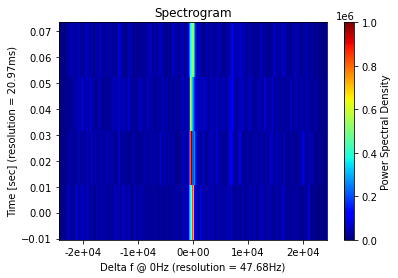

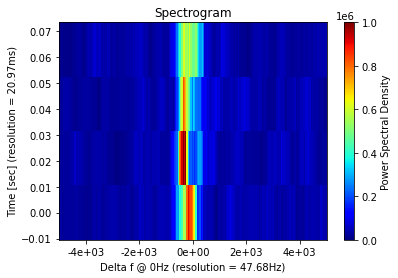

2.1417038173796153e-10

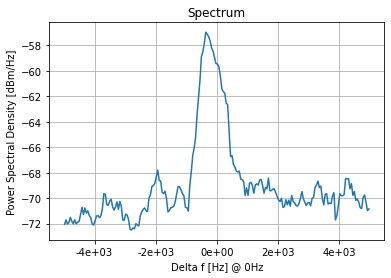

In [628]:
iq = get_iq_object(filename2)
iq.read_samples(1)
lframes=1024

time=0.1 #tdeath seconds of data                                                             
skip_time=5.3955 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=0, xspan=10000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plot_spectrum(axx[0,:], azz[0,:], dbm=True)
np.average(azz[0,:])

(3.141074185287874e-10,
 array([[1.01999677e-10, 1.15383123e-10, 9.79240287e-11, ...,
         1.69208169e-10, 1.37274196e-10, 8.21878696e-11],
        [1.01657910e-10, 1.61770747e-10, 1.91710694e-10, ...,
         5.10174592e-11, 8.84187784e-11, 1.00317838e-10],
        [7.04975437e-11, 8.78114688e-11, 7.44611160e-11, ...,
         9.01538490e-11, 5.47765297e-11, 4.25525289e-11],
        ...,
        [3.46086746e-11, 2.88951086e-11, 3.16210200e-11, ...,
         1.24591319e-10, 9.19783133e-11, 9.55736257e-11],
        [1.01678842e-10, 6.25477467e-11, 6.25372454e-11, ...,
         8.74694714e-11, 8.18533158e-11, 7.80855981e-11],
        [8.90789555e-11, 9.57927780e-11, 7.95585348e-11, ...,
         7.19800197e-11, 7.06891731e-11, 3.95099953e-11]]))

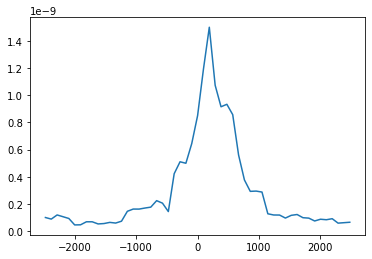

In [509]:
#iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.24.11.366.tiq' )
iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.07.06.55.25.448.tiq')

iq.read_samples(1)
lframes=512

time=1.00 #tdeath seconds of data                                                             
skip_time=5.025 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f]
nxx,nyy,nzz=get_cut_spectrogram2(xx,yy,zz, xcen=-6e2,xspan=5e3)
#plot_spectrum(nxx[0,:], nzz[0,:])
plt.plot(nxx[3,:], nzz[3,:])
np.average(nzz[1,:]), nzz

In [229]:
1.264862746482774e-09/7.452528993456048e-10

1.6972262001173437

7.956397483335217e-11

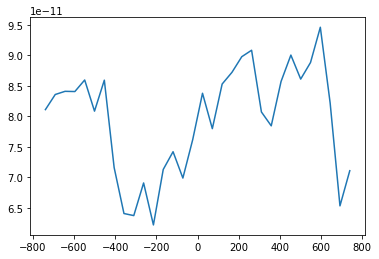

In [222]:
iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.24.11.366.tiq' )
iq.read_samples(1)
lframes=1024

time=0.15 #tdeath seconds of data                                                             
skip_time=7.025 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-7e3,xspan=1500)
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plt.plot(axx[0,:], azz[0,:])
np.average(azz[0,:])

In [208]:
7.968079681823344e-11-1.0069927824451414e-09

-9.273119856269079e-10

In [209]:
-9.273119856269079e-10/7.968079681823344e-11

-11.63783524582814

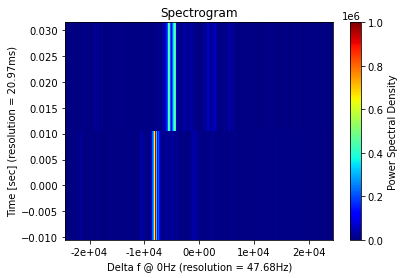

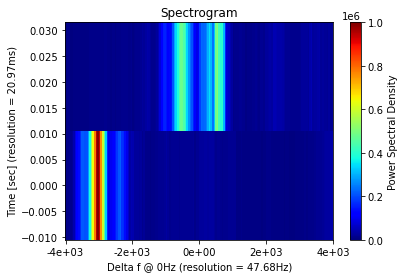

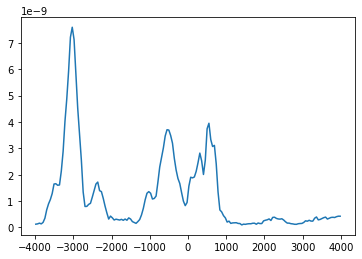

1.1908379192194838e-09

In [341]:
iq = get_iq_object('/lustre/ap/litv-exp/2021-05-00_E143_TwoPhotonDeday_ssanjari/analyzers/410MHz/E143-410MHz-2021.05.08.21.29.31.962.tiq')
iq.read_samples(1)
lframes=1024

time=0.043 #tdeath seconds of data                                                             
skip_time=5.0 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f]
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=-5e3,xspan=8000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plt.plot(axx[0,:], azz[0,:])
plt.show()
np.average(azz[0,:])

In [12]:
def get_cut_spectrogram2(xx, yy, zz, xcen=None, xspan=None, ycen=None, yspan=None, invert=False):
    if not xspan:
        xspanmask = (xx[0, :] != 0) | (xx[0, :] == 0)
    else:
        xspanmask = (xx[0, :] <= xcen + xspan /
                     2) & (xx[0, :] >= xcen - xspan / 2)

    if not yspan:
        yspanmask = (yy[:, 0] != 0) | (yy[:, 0] == 0)
    else:
        yspanmask = (yy[:, 0] <= ycen + yspan /
                     2) & (yy[:, 0] >= ycen - yspan / 2)

    if invert:
        xspanmask = np.invert(xspanmask)
        yspanmask = np.invert(yspanmask)

    # need to create a new meshgrid due to cut, otherwise new data won't fit old mesh
    newz = zz[yspanmask][:, xspanmask]
    newx, newy = np.meshgrid(
        np.arange(np.shape(newz)[1]), np.arange(np.shape(newz)[0]))
    if np.shape(yy[:,0])[0]==1: delta_y=0
    else: delta_y = yy[1, 0] - yy[0, 0]
    newy = newy * delta_y
    delta_x = xx[0, 1] - xx[0, 0]
    newx = newx - newx[-1, -1] / 2
    newx = newx * delta_x

    return newx, newy, newz

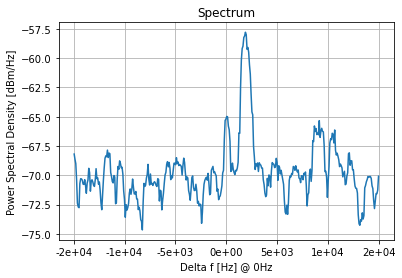

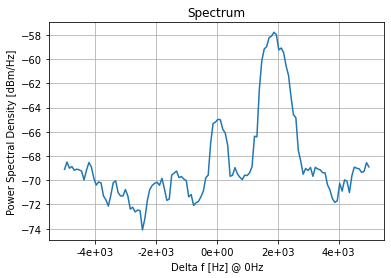

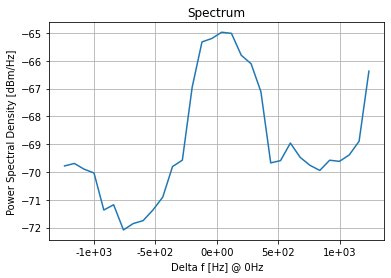

In [948]:
isomer_substract(filename2,612,0.03,5.1,-2e3,3e4)
isomer_substract(filename2,612,0.03,5.1,-2e3,1e4)
isomer_substract(filename2,612,0.03,5.1,-2e3,2.5e3)

# Bromine

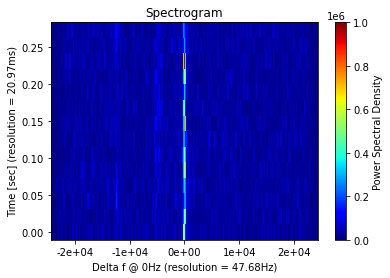

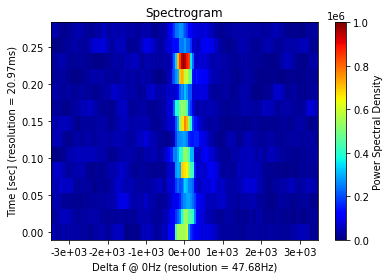

4.423371254638477e-09

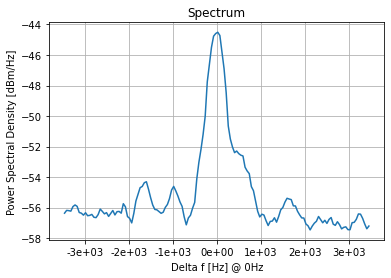

In [656]:
#Bromine
iq = get_iq_object('/lustre/ap/litv-exp/2021-07-03_E143_TwoPhotonDecay_ssanjari/analyzers/410/410MH\
z-2021.07.01.22.31.21.087.tiq')
iq.read_samples(1)
lframes=1024

time=0.3 #tdeath seconds of data                                                             
skip_time=1.1 #starting point in time to analyse                                              
nframes=int(time*iq.fs/lframes)
sframes=int(skip_time*iq.fs/lframes)
iq.read(nframes=nframes, lframes=lframes, sframes=sframes)
iq.method='mtm' #'fft', 'mtm', 'welch'                                                                                                                 \                                                                                                       
xx, yy, zz = iq.get_spectrogram(nframes, lframes) #f=x[t,p], t=y[p,f], p=z[t,f] 
plot_spectrogram(xx,yy,zz)
plt.show()
nxx,nyy,nzz=get_cut_spectrogram(xx,yy,zz, xcen=0, xspan=7000)
plot_spectrogram(nxx,nyy,nzz)
plt.show()
axx,ayy,azz=get_averaged_spectrogram(nxx,nyy,nzz, len(nxx[:,0]))
plot_spectrum(axx[0,:], azz[0,:], dbm=True)
np.average(azz[0,:])